### Logistic map

$x_{n} = r x_{n-1}(1 - x_{n-1})$

In [1]:
def logistic(r, x):
    return r * x * (1 - x)

In [2]:
logistic(0.1, 3)

-0.6000000000000001

In [3]:
N = 100  # iterations

def logistic_series(r, x0=0.1):
    x = [x0]    
    for i in range(N - 1):
        x.append(logistic(r, x[-1]))
    return x

Text(0.5, 1.0, 'r=1')

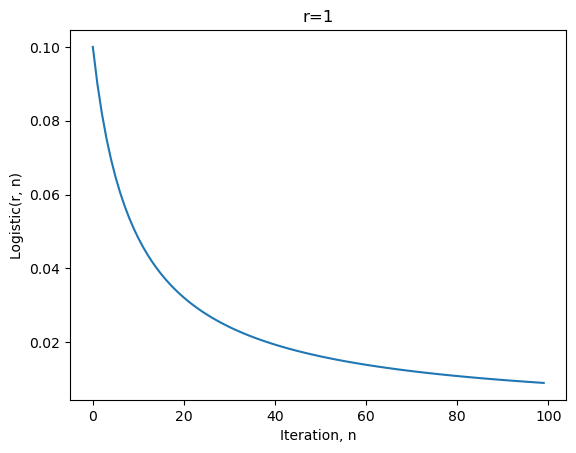

In [4]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
r = 1  # don't forget to vary r
# r = 3.1 might model animal populations
ax.plot(range(N), logistic_series(r))
ax.set_xlabel("Iteration, n")
ax.set_ylabel("Logistic(r, n)")
ax.set_title(f"r={r}")

In [5]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000

def plot_logistic_map(r_min, r_max, filename):
    logistic_result = []
    last_n_values = 500
    r_input = []
    for r in np.linspace(r_min, r_max, 1000):
        r_input.append([r] * last_n_values) 
        logistic_result.append(logistic_series(r)[-last_n_values:])
    
    f, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(r_input, logistic_result, s=0.001)
    ax.set_xlabel("r input value")
    ax.set_ylabel("Possible logistic series outputs")
    ax.set_ylim(0, 1)
    f.savefig(filename)
    plt.close(f)

In [13]:
n_frames = 100
max_r = 4
arr = np.logspace(-1, np.log10(1000), n_frames) / 1000
arr = np.insert(arr, 0, 0)
min_r = np.ones_like(arr) * max_r - arr[::-1] * max_r
min_r = min_r[:-1]

In [14]:
for i, start in enumerate(min_r):
    plot_logistic_map(start, max_r, f"plots/plot_{i:03d}.png")